# About
This document is about the Kaggle challenge [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge/)

# First some general statistics

In [1]:
with open("train.csv") as f:
    lines = f.readlines()
with open("test.csv") as f:
    lines_competition_test = f.readlines()
print("The training set contains %i entries and the final competition test contains %i entries." %
      (len(lines)-1, len(lines_competition_test)-1))

The training set contains 61878 entries and the final competition test contains 144368 entries.


# Parse the data

In [2]:
print(lines[0])

id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target



In [3]:
print(lines_competition_test[0])

id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93



In [4]:
dataset = []
for line in lines[1:]:  # Skip header
    line = line.strip().split(",")
    dataset.append({'id': int(line[0]),
                    'features': [int(feature) for feature in line[1:-1]],
                    'target': int(line[-1][-1])-1}) # target is Class_i, where i is 1,...,9
print(dataset[0])

dataset_competition_test = []
for line in lines_competition_test[1:]:  # Skip header
    line = line.strip().split(",")
    dataset_competition_test.append({'id': int(line[0]),
                                     'features': [int(feature) for feature in line[1:]]})
print(len(dataset_competition_test))

{'target': 0, 'id': 1, 'features': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 4, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 11, 0, 1, 1, 0, 1, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}
144368


# Data analysis

In [5]:
class_data = {}
for data in dataset:
    if data['target'] not in class_data:
        class_data[data['target']] = 1
    else:
        class_data[data['target']] += 1

for class_name, counter in sorted(class_data.items()):
    print("Class {0} has {1:>5} training examples.".format(class_name, counter))

Class 0 has  1929 training examples.
Class 1 has 16122 training examples.
Class 2 has  8004 training examples.
Class 3 has  2691 training examples.
Class 4 has  2739 training examples.
Class 5 has 14135 training examples.
Class 6 has  2839 training examples.
Class 7 has  8464 training examples.
Class 8 has  4955 training examples.


# Feature analysis

In [6]:
mins = [dataset[0]['features'][i] for i in range(93)]
maxs = [dataset[0]['features'][i] for i in range(93)]
for data in dataset:
    for i in range(93):
        mins[i] = min(mins[i], data['features'][i])
        maxs[i] = max(maxs[i], data['features'][i])
print(mins)
print(maxs)

print("Competition set")
mins = [dataset_competition_test[0]['features'][i] for i in range(93)]
maxs = [dataset_competition_test[0]['features'][i] for i in range(93)]
for data in dataset_competition_test:
    for i in range(93):
        mins[i] = min(mins[i], data['features'][i])
        maxs[i] = max(maxs[i], data['features'][i])
print(mins)
print(maxs)
print("Max max: %i" % max(maxs))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[61, 51, 64, 70, 19, 10, 38, 76, 43, 30, 38, 30, 72, 33, 46, 37, 43, 32, 121, 27, 14, 22, 64, 263, 30, 33, 123, 22, 69, 87, 59, 149, 24, 84, 105, 84, 22, 39, 78, 41, 36, 41, 42, 34, 80, 41, 47, 49, 81, 73, 44, 48, 53, 63, 27, 62, 30, 117, 97, 40, 38, 56, 51, 73, 38, 36, 104, 109, 76, 46, 31, 30, 352, 231, 80, 102, 29, 80, 25, 54, 26, 24, 79, 76, 55, 65, 67, 30, 61, 130, 52, 19, 87]
Competition set
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[64, 45, 84, 82, 14, 11, 44, 100, 47, 5

### Analysis of maxima by class

In [7]:
for class_i in range(9):
    maxs = [0 for i in range(93)]
    for data in dataset:
        if data['target'] != class_i:
            continue
        for i in range(93):
            maxs[i] = max(maxs[i], data['features'][i])
    print("Max. for class %i: %s" % (class_i, str(maxs[:10])))

Max. for class 0: [25, 10, 7, 5, 19, 5, 19, 56, 7, 26]
Max. for class 1: [22, 5, 6, 7, 13, 3, 9, 14, 41, 24]
Max. for class 2: [22, 7, 5, 5, 4, 3, 7, 13, 43, 22]
Max. for class 3: [30, 2, 5, 9, 5, 2, 2, 6, 20, 30]
Max. for class 4: [3, 2, 4, 5, 2, 1, 1, 6, 15, 4]
Max. for class 5: [11, 26, 64, 67, 12, 10, 9, 21, 18, 12]
Max. for class 6: [13, 39, 10, 10, 5, 3, 15, 22, 17, 30]
Max. for class 7: [61, 51, 44, 70, 11, 8, 38, 23, 29, 22]
Max. for class 8: [13, 5, 6, 11, 6, 3, 8, 76, 15, 22]


In [8]:
%matplotlib inline

In [9]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

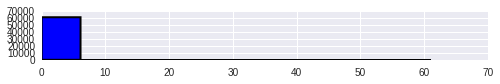

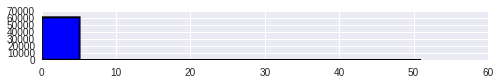

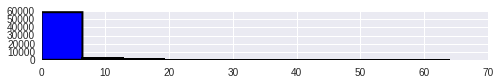

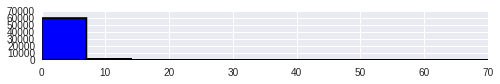

In [10]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

for feature in range(4):
    data = [d['features'][feature] for d in dataset]
    fig = plt.figure()
    ax = fig.add_subplot(4, 1, feature+1)
    line = ax.hist(data, color='blue', lw=2)
plt.show()
##plt.hist(small);

It looks *very* much as if most features would be 0 most of the time.

# Experimenting with classifiers
In order to test how well our ideas perform, we need a labeled training and test set (and eventually a validation set and a development set).

In [134]:
current_best_score = 0.53344
current_best_score_by_class = [ 0.00822475,  0.04901561,  0.03098987,  0.01030099,  0.01261864,  0.04582523,
  0.0105592,   0.03471553,  0.01979984]
training_set = []
test_set = []
complete_set = []

# Build data structure for splitting
data_by_class = {}
for data in dataset:
    if data['target'] in data_by_class:
        data_by_class[data['target']].append(data)
    else:
        data_by_class[data['target']] = [data]

# split
for class_name, class_data in data_by_class.items():
    for i, d in enumerate(class_data):
        complete_set.append(d)
        if i % 10 == 0: # 10% test set, 90% training set
            test_set.append(d)
        else:
            training_set.append(d)
            
print("Training set has %i entries, test set has %i entries." % (len(training_set), len(test_set)))

Training set has 55686 entries, test set has 6192 entries.


In [91]:
import numpy
y_train = numpy.array([d['target'] for d in training_set], dtype=numpy.int32)
X_train = numpy.array([d['features'] for d in training_set], dtype=numpy.float32)
y_test = numpy.array([d['target'] for d in test_set], dtype=numpy.int32)
X_test = numpy.array([d['features'] for d in test_set], dtype=numpy.float32)
y_complete = numpy.array([d['target'] for d in complete_set], dtype=numpy.int32)
X_complete = numpy.array([d['features'] for d in complete_set], dtype=numpy.float32)

X_competition_test = numpy.array([d['features'] for d in dataset_competition_test], dtype=numpy.float32)

In [132]:
import time
from sklearn.metrics import log_loss
from math import log

def log_loss_by_class(y_true, y_pred):
    c = [0.0 for i in range(9)]
    for tr, pred in zip(y_true, y_pred):
        val = max(min(pred[tr], 1-10**(-15)),10**(-15))
        c[tr] += -log(val)
    return c

def try_classifier(clf):
    """Train a classifier and score against our labeled test set"""
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    y_pred = clf.predict_proba(X_test)
    score = log_loss(y_test, y_pred)
    t2 = time.time()
    print("%0.2f s for training, %0.2f s for scoring, got a score of %0.4f." % (t1-t0, t2-t1, score))
    classesloss = log_loss_by_class(y_test, y_pred)
    classesloss = numpy.array(classesloss)/len(y_pred)
    improved = False
    for i in range(9):
        if classesloss[i] < current_best_score_by_class[i]:
            improved = True
    if improved:
        print("!"*80)
        print("Improved! (partially)")
        print(classesloss)

def create_submission(clf):
    import gzip
    y_pred = clf.predict_proba(X_test)
    score = log_loss(y_test, y_pred)
    print("Expected score: %0.4f. Currently, the best submission at Kaggle is %0.4f." % (score, current_best_score))
    y_pred = clf.predict_proba(X_competition_test)
    with gzip.open("submission.csv.gz", "wb") as f:
        f.write("id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9\n")
        for i, pred in enumerate(y_pred, start=1):
            f.write(str(i) + "," + ",".join([str(el) for el in pred]) + "\n")
    print("http://www.kaggle.com/c/otto-group-product-classification-challenge")

## SVC
Try it from http://scikit-learn.org/stable/auto_examples/plot_classifier_comparison.html

In [14]:
from sklearn.svm import SVC
svc_clf = SVC(gamma=2, C=1, probability=True)
#try_classifier(svc_clf)  # This takes some hours on a strong machine and has a score of 1.8861
#create_submission(svc_clf)

In [15]:
#svc_linear_clf = SVC(kernel="linear", C=0.025, probability=True)
#try_classifier(svc_linear_clf)
#create_submission(svc_linear_clf)

In [16]:
#svc_sigmoid_clf = SVC(kernel="sigmoid", C=0.025, probability=True)
#try_classifier(svc_sigmoid_clf)
#create_submission(svc_sigmoid_clf)

## DecisionTree

In [135]:
from sklearn.tree import DecisionTreeClassifier
for i in range(6, 11):
    print(i)
    decision_tree_clf = DecisionTreeClassifier(max_depth=i)
    try_classifier(decision_tree_clf)

1
0.10 s for training, 0.00 s for scoring, got a score of 1.7765.
2
0.18 s for training, 0.00 s for scoring, got a score of 1.6224.
3
0.27 s for training, 0.00 s for scoring, got a score of 1.5006.
4
0.34 s for training, 0.00 s for scoring, got a score of 1.4203.
5
0.42 s for training, 0.00 s for scoring, got a score of 1.3342.
6
0.49 s for training, 0.00 s for scoring, got a score of 1.2577.
7
0.56 s for training, 0.00 s for scoring, got a score of 1.2316.
8
0.62 s for training, 0.00 s for scoring, got a score of 1.1757.
9
0.64 s for training, 0.00 s for scoring, got a score of 1.1673.
10
0.62 s for training, 0.00 s for scoring, got a score of 1.1957.
11
0.67 s for training, 0.00 s for scoring, got a score of 1.2192.
12
0.72 s for training, 0.00 s for scoring, got a score of 1.2639.
13
0.77 s for training, 0.00 s for scoring, got a score of 1.3864.
14
0.82 s for training, 0.00 s for scoring, got a score of 1.5591.
15
0.87 s for training, 0.00 s for scoring, got a score of 1.7492.
16
0

In [18]:
decision_tree_clf = DecisionTreeClassifier(max_depth=9)
try_classifier(decision_tree_clf)
create_submission(decision_tree_clf)

0.58 s for training, 0.00 s for scoring, got a score of 1.1618.
Expected score: 1.1618. Currently, the best submission at Kaggle is 0.5380.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## AdaBoostClassifier

In [136]:
#from sklearn.ensemble import AdaBoostClassifier
#adaboost_clf = AdaBoostClassifier()
#try_classifier(adaboost_clf)
#create_submission(adaboost_clf)

5.54 s for training, 0.09 s for scoring, got a score of 2.0485.
Expected score: 2.0485. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## KNN

In [138]:
#from sklearn.neighbors import KNeighborsClassifier
#knnclf = KNeighborsClassifier(5)
#try_classifier(knnclf) 
#create_submission(knnclf)

2.72 s for training, 34.78 s for scoring, got a score of 2.3611.
Expected score: 2.3611. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## LDA

In [140]:
from sklearn.lda import LDA
lda_clf = LDA()
try_classifier(lda_clf)
create_submission(lda_clf)

0.26 s for training, 0.02 s for scoring, got a score of 1.0216.
Expected score: 1.0216. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## QDA

In [141]:
from sklearn.qda import QDA
qda_clf = QDA()
try_classifier(qda_clf)
create_submission(qda_clf)

0.24 s for training, 0.09 s for scoring, got a score of 5.9614.
Expected score: 5.9614. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## GaussianNB

In [142]:
from sklearn.naive_bayes import GaussianNB
gaussiannb_clf = GaussianNB()
try_classifier(gaussiannb_clf)
create_submission(gaussiannb_clf)

0.02 s for training, 0.03 s for scoring, got a score of 7.1846.
Expected score: 7.1846. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## GMM classification

In [143]:
a = """
from sklearn.mixture import GMM
gmm_diag_clf = GMM(n_components=9, covariance_type='diag', init_params='wc', n_iter=20)
t0 = time.time()
X_train_by_class = {}
for i in range(9):
    X_train_by_class[i] = []
for x, y in zip(X_train, y_train):
    X_train_by_class[y].append(x)
init = numpy.array([numpy.array(X_train_by_class[i]).mean(axis=0) for i in range(9)])
print(init.shape)
gmm_diag_clf.means = init
gmm_diag_clf.fit(X_train)
t1 = time.time()
y_pred = gmm_diag_clf.predict_proba(X_test)
score = log_loss(y_test, y_pred)
t2 = time.time()
print("%0.2f s for training, %0.2f s for scoring, got a score of %0.4f." % (t1-t0, t2-t1, score))
create_submission(gmm_diag_clf)
"""

(9, 93)
12.59 s for training, 0.01 s for scoring, got a score of 30.5374.
Expected score: 30.5374. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## Geometric distribution
As every feature represents a count, every feature is very likely to follow a geometric distribution:

\begin{equation*}
P(X=n)=p(1-p)^n
\end{equation*}

The simplest way to use this fact is to make a maximum likelihood estimiation seperately for each feature and class on the training data (as training).

After that, the evaluation of new recordings with the Naive bayes classifier.

In [25]:
#from sklearn.naive_bayes import MultinomialNB
#nb_clf = MultinomialNB(alpha=0.2, fit_prior=True, class_prior=None)
#try_classifier(nb_clf)
#create_submission(nb_clf)

0.03 s for training, 0.01 s for scoring, got a score of 3.4472.
Expected score: 3.4472. Currently, the best submission at Kaggle is 0.5380.
http://www.kaggle.com/c/otto-group-product-classification-challenge


## GradientBoostingClassifier
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [144]:
#a = """
from sklearn.ensemble import GradientBoostingClassifier
nb_clf = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=100,
                                    subsample=1.0,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_depth=3,
                                    init=None,
                                    random_state=None,
                                    max_features=None,
                                    verbose=0,
                                    max_leaf_nodes=None,
                                    warm_start=False)
try_classifier(nb_clf)
create_submission(nb_clf)
#"""

254.03 s for training, 0.07 s for scoring, got a score of 0.5938.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Improved! (partially)
[ 0.05308346  0.13177644  0.13650979  0.06674199  0.00510585  0.05149895
  0.05173902  0.04835077  0.04894951]
Expected score: 0.5938. Currently, the best submission at Kaggle is 0.5334.
http://www.kaggle.com/c/otto-group-product-classification-challenge


In [145]:
print(current_best_score_by_class)

[0.00822475, 0.04901561, 0.03098987, 0.01030099, 0.01261864, 0.04582523, 0.0105592, 0.03471553, 0.01979984]


## Neural Networks

Install [lasagne](http://lasagne.readthedocs.org/en/latest/user/installation.html#install-from-source) (from [source](https://github.com/benanne/Lasagne)) for the following parts:

```bash
$ git clone git@github.com:benanne/Lasagne.git
$ cd Lasagne
$ sudo -H python setup.py install
```


See [danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/) for an introduction to lasagne.

The [Lasagne Tutorial](http://nbviewer.ipython.org/github/craffel/Lasagne-tutorial/blob/master/examples/tutorial.ipynb) is even better (and uses iPython :-) )

Don't forget to set `~/.theanorc` to

```text
[global]
exception_verbosity=high
floatX=float32
```

In [107]:
import lasagne
import theano
import theano.tensor as T

N_CLASSES = 9

# First, construct an input layer.
# The shape parameter defines the expected input shape, which is just the shape of our data matrix X.
l_in = lasagne.layers.InputLayer(shape=X_train.shape)
# A dense layer implements a linear mix (xW + b) followed by a nonlinearity.
hiddens = [32, 32, 18, 32]
layers = [l_in]

def relu(x):
    return theano.tensor.switch(x<0, 0, x)

for n_units in hiddens:
    l_hidden_1 = lasagne.layers.DenseLayer(
        layers[-1],  # The first argument is the input to this layer
        num_units=n_units,  # This defines the layer's output dimensionality
        nonlinearity=lasagne.nonlinearities.tanh)  # Various nonlinearities are available such as relu
    layers.append(l_hidden_1)
# For our output layer, we'll use a dense layer with a softmax nonlinearity.
l_output = lasagne.layers.DenseLayer(layers[-1], num_units=N_CLASSES, 
                                     nonlinearity=lasagne.nonlinearities.softmax)
# Now, we can generate the symbolic expression of the network's output given an input variable.
net_input = T.matrix('net_input')
net_output = l_output.get_output(net_input)

We should apply multi-cass log loss:
    
\begin{equation*}
log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}),
\end{equation*}

where $N$ is the number of products in the test set, $M=9$ is the number of class labels, log is the natural logarithm, $y_{ij}$ is 1 if observation $i$ is in class $j$ and $0$ otherwise, and $p_{ij}$ is the predicted probability that observation $i$ belongs to class $j$.

In [108]:
# As a loss function, we'll use Theano's categorical_crossentropy function.
# This allows for the network output to be class probabilities,
# but the target output to be class labels.
true_output = T.ivector('true_output')
loss = T.mean(T.nnet.categorical_crossentropy(net_output, true_output))

reg = lasagne.regularization.l2(l_output)
loss = loss + 0.001*reg
#NLL_LOSS = -T.sum(T.log(p_y_given_x)[T.arange(y.shape[0]), y])
# Retrieving all parameters of the network is done using get_all_params,
# which recursively collects the parameters of all layers connected to the provided layer.
all_params = lasagne.layers.get_all_params(l_output)

# Now, we'll generate updates using Lasagne's SGD function
updates = lasagne.updates.momentum(loss, all_params, learning_rate=0.1)

# Finally, we can compile Theano functions for training and computing the output.
train = theano.function([net_input, true_output], loss, updates=updates)
get_output = theano.function([net_input], net_output)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_s = scaler.fit_transform(X_train)
#X_test_s = scaler.transform(X_test)

# Train
epochs = 500
for n in range(epochs):
    train(X_train, y_train)

In [125]:
import gzip
y_pred = get_output(X_test)
score = log_loss(y_test, y_pred)
print("Expected score: %0.4f. Currently, our best submission at Kaggle is %0.4f." % (score, current_best_score))

classesloss = log_loss_by_class(y_test, y_pred)
print(numpy.array(classesloss)/len(y_pred))
print(sum(classesloss)/len(y_pred))

y_pred = get_output(X_competition_test)
with gzip.open("submission.csv.gz", "wb") as f:
    f.write("id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9\n")
    for i, pred in enumerate(y_pred, start=1):
        f.write(str(i) + "," + ",".join([str(el) for el in pred]) + "\n")
print("http://www.kaggle.com/c/otto-group-product-classification-challenge")

Expected score: 0.5438. Currently, our best submission at Kaggle is 0.5334.
[ 0.04642513  0.10722609  0.14724586  0.0660733   0.00659836  0.04373696
  0.04468819  0.04253366  0.03929795]
0.543825498947
http://www.kaggle.com/c/otto-group-product-classification-challenge


## Other
From https://gist.github.com/chrisdubois/6b93a8028f4dc40cab49

[ 0.00822475  0.04901561  0.03098987  0.01030099  0.01261864  0.04582523
  0.0105592   0.03471553  0.01979984]
0.222049671137
